In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import nltk
import spacy
import re

import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
x = pd.read_csv('after_eda_audible.csv')
x.head()

,name,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
0,Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
1,The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
2,The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
3,Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
4,"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [3]:
df = x.set_index('name')
df.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [4]:
#stars classification

def classify_stars(stars):
    if stars >= 5:
        return 1
    else:
        return 0

In [5]:
df['stars_class'] = df['stars'].apply(classify_stars)

In [6]:
df

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0,1
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Why We Fly,56,5.0,100.0,1.0,2014,6,1,0,0,0,1
River Town,876,5.0,836.0,1.0,2010,5,0,1,0,0,1
Figures in a Landscape,1004,4.0,949.0,1.0,2018,6,0,1,0,0,0


In [7]:
columns_to_drop = ['stars', 'ratings']
df_features = df.drop(columns_to_drop, axis=1)
df_features.head()

,time,price,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,
Geronimo Stilton #11 & #12,140,468.0,2008,8,0,1,0,0,1
The Burning Maze,788,820.0,2018,5,0,1,0,0,0
The Deep End,123,410.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,615.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,820.0,2010,1,0,1,0,0,0


In [8]:
df_features.stars_class.value_counts()

0    8311
1    6761
Name: stars_class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for classification, no need to scale
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns='stars_class'), df_features.stars_class, test_size=0.2, random_state=42)



#next step, use randomforest, cutboost (install), decision tree
#when debugging, use smaller data, if it makes sense, then use 

In [10]:
X_train.shape

(12057, 8)

In [11]:
X_test.shape

(3015, 8)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state=42, max_depth=5,n_estimators=150, ccp_alpha=0.001)

In [23]:
param_grid = {'n_estimators':np.arange(1,60)}

In [24]:
grid_search = GridSearchCV(classifier_rf, param_grid, cv=5, scoring='accuracy')

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0.001, max_depth=5,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])},
             scoring='accuracy')

In [26]:
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))

Best Score:0.5511321795556986
Best Parameters: {'n_estimators': 6}


In [27]:
y_pred = grid_search.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1670
           1       0.00      0.00      0.00      1345

    accuracy                           0.55      3015
   macro avg       0.28      0.50      0.36      3015
weighted avg       0.31      0.55      0.39      3015



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#try Decision Tree as Random Forest accuracy is low

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)

In [32]:
clf = clf.fit(X_train, y_train)

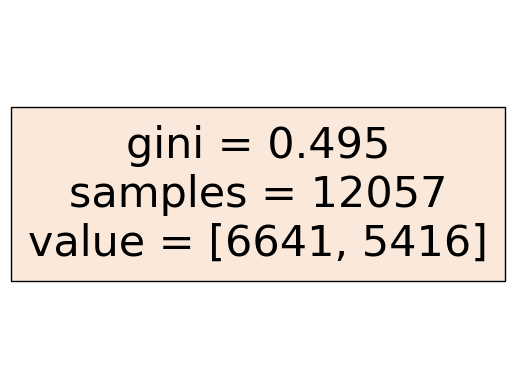

In [33]:
#plt.figure(figure=(10,10))
plot_tree(clf, filled=True)
plt.show()

In [34]:
test_pred = clf.predict(X_test)

In [35]:
clf.score(X_test, y_test)

0.5538971807628524

In [36]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, test_pred, average='weighted')

# Print the F1 score. It is a harmonic mean of precision and recall given by- F1 = 2*Precision*Recall/(Precision + Recall)
print(f"F1 score: {f1:.2f}")

F1 score: 0.39


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[1670,    0],
       [1345,    0]])


- look at predict probab, play with manual calculation with confusion matrix. get all row probabilities in predict proba, 
- try to get a better confusion matrix by improving models (generate synthetic data for positives and negatives)
-different models (cut-boost, gradient boost)
Can you elaborate further on F1, ROC-AUC score, log-loss

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
predictions = knn.predict_proba(X_test)
print(predictions)

[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 ...
 [0.2 0.8]
 [0.8 0.2]
 [0.2 0.8]]


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [41]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [42]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[1403  267]
 [1027  318]]


In [43]:
print(accuracy_score( 
     y_test, gbc.predict(X_test)))

0.5708126036484246


In [44]:
pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.84      0.68      1670
           1       0.54      0.24      0.33      1345

    accuracy                           0.57      3015
   macro avg       0.56      0.54      0.51      3015
weighted avg       0.56      0.57      0.53      3015



In [45]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Train Score: 0.5569380205805742
Test Score: 0.566832504145937


In [46]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 2}
Train Score: 0.5541175454292352
Test Score: 0.5635157545605307


In [47]:
import catboost as ctb
from sklearn import metrics

In [48]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
print(model_CBC)

Learning rate set to 0.029828
0:	learn: 0.6927038	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.6922306	total: 72.2ms	remaining: 36s
2:	learn: 0.6917004	total: 75.4ms	remaining: 25.1s
3:	learn: 0.6912653	total: 78.4ms	remaining: 19.5s
4:	learn: 0.6908006	total: 81.2ms	remaining: 16.2s
5:	learn: 0.6904243	total: 84.4ms	remaining: 14s
6:	learn: 0.6900395	total: 87.3ms	remaining: 12.4s
7:	learn: 0.6896855	total: 90.2ms	remaining: 11.2s
8:	learn: 0.6893457	total: 93ms	remaining: 10.2s
9:	learn: 0.6888898	total: 95.7ms	remaining: 9.48s
10:	learn: 0.6885931	total: 98.6ms	remaining: 8.87s
11:	learn: 0.6882336	total: 101ms	remaining: 8.34s
12:	learn: 0.6879725	total: 104ms	remaining: 7.89s
13:	learn: 0.6876142	total: 106ms	remaining: 7.48s
14:	learn: 0.6873044	total: 109ms	remaining: 7.14s
15:	learn: 0.6869833	total: 111ms	remaining: 6.84s
16:	learn: 0.6867433	total: 113ms	remaining: 6.55s
17:	learn: 0.6864552	total: 115ms	remaining: 6.28s
18:	learn: 0.6862823	total: 117ms	remaining: 6.04s
19:	le

254:	learn: 0.6620521	total: 592ms	remaining: 1.73s
255:	learn: 0.6619611	total: 594ms	remaining: 1.73s
256:	learn: 0.6618880	total: 596ms	remaining: 1.72s
257:	learn: 0.6617955	total: 597ms	remaining: 1.72s
258:	learn: 0.6617119	total: 599ms	remaining: 1.71s
259:	learn: 0.6616371	total: 601ms	remaining: 1.71s
260:	learn: 0.6615813	total: 603ms	remaining: 1.71s
261:	learn: 0.6615054	total: 605ms	remaining: 1.7s
262:	learn: 0.6614471	total: 607ms	remaining: 1.7s
263:	learn: 0.6613895	total: 609ms	remaining: 1.7s
264:	learn: 0.6613220	total: 611ms	remaining: 1.69s
265:	learn: 0.6612392	total: 613ms	remaining: 1.69s
266:	learn: 0.6611920	total: 615ms	remaining: 1.69s
267:	learn: 0.6611417	total: 617ms	remaining: 1.68s
268:	learn: 0.6610061	total: 619ms	remaining: 1.68s
269:	learn: 0.6609526	total: 621ms	remaining: 1.68s
270:	learn: 0.6608776	total: 622ms	remaining: 1.67s
271:	learn: 0.6608402	total: 624ms	remaining: 1.67s
272:	learn: 0.6607933	total: 626ms	remaining: 1.67s
273:	learn: 0.6

455:	learn: 0.6459420	total: 992ms	remaining: 1.18s
456:	learn: 0.6458700	total: 995ms	remaining: 1.18s
457:	learn: 0.6457885	total: 998ms	remaining: 1.18s
458:	learn: 0.6457193	total: 1s	remaining: 1.18s
459:	learn: 0.6456341	total: 1s	remaining: 1.18s
460:	learn: 0.6455763	total: 1s	remaining: 1.17s
461:	learn: 0.6454821	total: 1.01s	remaining: 1.17s
462:	learn: 0.6454067	total: 1.01s	remaining: 1.17s
463:	learn: 0.6453104	total: 1.01s	remaining: 1.17s
464:	learn: 0.6452490	total: 1.01s	remaining: 1.17s
465:	learn: 0.6451524	total: 1.01s	remaining: 1.16s
466:	learn: 0.6450966	total: 1.02s	remaining: 1.16s
467:	learn: 0.6450047	total: 1.02s	remaining: 1.16s
468:	learn: 0.6449253	total: 1.02s	remaining: 1.16s
469:	learn: 0.6448497	total: 1.02s	remaining: 1.15s
470:	learn: 0.6447885	total: 1.02s	remaining: 1.15s
471:	learn: 0.6446983	total: 1.03s	remaining: 1.15s
472:	learn: 0.6445876	total: 1.03s	remaining: 1.15s
473:	learn: 0.6445233	total: 1.03s	remaining: 1.15s
474:	learn: 0.6444715

649:	learn: 0.6318235	total: 1.39s	remaining: 749ms
650:	learn: 0.6317890	total: 1.39s	remaining: 747ms
651:	learn: 0.6317200	total: 1.4s	remaining: 745ms
652:	learn: 0.6316610	total: 1.4s	remaining: 743ms
653:	learn: 0.6316206	total: 1.4s	remaining: 740ms
654:	learn: 0.6315314	total: 1.4s	remaining: 738ms
655:	learn: 0.6314147	total: 1.4s	remaining: 736ms
656:	learn: 0.6313485	total: 1.4s	remaining: 733ms
657:	learn: 0.6312844	total: 1.41s	remaining: 731ms
658:	learn: 0.6312025	total: 1.41s	remaining: 729ms
659:	learn: 0.6311573	total: 1.41s	remaining: 727ms
660:	learn: 0.6310966	total: 1.41s	remaining: 725ms
661:	learn: 0.6310288	total: 1.41s	remaining: 722ms
662:	learn: 0.6309738	total: 1.42s	remaining: 720ms
663:	learn: 0.6309263	total: 1.42s	remaining: 718ms
664:	learn: 0.6308291	total: 1.42s	remaining: 716ms
665:	learn: 0.6307433	total: 1.42s	remaining: 713ms
666:	learn: 0.6306754	total: 1.42s	remaining: 711ms
667:	learn: 0.6306439	total: 1.43s	remaining: 709ms
668:	learn: 0.6305

839:	learn: 0.6195839	total: 1.79s	remaining: 341ms
840:	learn: 0.6195187	total: 1.79s	remaining: 339ms
841:	learn: 0.6194821	total: 1.79s	remaining: 337ms
842:	learn: 0.6194508	total: 1.8s	remaining: 335ms
843:	learn: 0.6194144	total: 1.8s	remaining: 332ms
844:	learn: 0.6193548	total: 1.8s	remaining: 330ms
845:	learn: 0.6193059	total: 1.8s	remaining: 328ms
846:	learn: 0.6192560	total: 1.8s	remaining: 326ms
847:	learn: 0.6191853	total: 1.81s	remaining: 324ms
848:	learn: 0.6191082	total: 1.81s	remaining: 322ms
849:	learn: 0.6190592	total: 1.81s	remaining: 319ms
850:	learn: 0.6189714	total: 1.81s	remaining: 317ms
851:	learn: 0.6189347	total: 1.81s	remaining: 315ms
852:	learn: 0.6188171	total: 1.81s	remaining: 313ms
853:	learn: 0.6187506	total: 1.82s	remaining: 311ms
854:	learn: 0.6186522	total: 1.82s	remaining: 309ms
855:	learn: 0.6185827	total: 1.82s	remaining: 306ms
856:	learn: 0.6185363	total: 1.82s	remaining: 304ms
857:	learn: 0.6184663	total: 1.82s	remaining: 302ms
858:	learn: 0.618

In [49]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [50]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      1670
           1       0.51      0.30      0.38      1345

    accuracy                           0.56      3015
   macro avg       0.54      0.53      0.52      3015
weighted avg       0.55      0.56      0.53      3015

[[1281  389]
 [ 944  401]]


In [51]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)
print(model_CBR)

Learning rate set to 0.060676
0:	learn: 0.4972471	total: 3.25ms	remaining: 3.25s
1:	learn: 0.4970446	total: 5.71ms	remaining: 2.85s
2:	learn: 0.4967707	total: 7.83ms	remaining: 2.6s
3:	learn: 0.4965322	total: 9.54ms	remaining: 2.38s
4:	learn: 0.4963955	total: 11ms	remaining: 2.19s
5:	learn: 0.4962497	total: 13.1ms	remaining: 2.17s
6:	learn: 0.4961170	total: 15.4ms	remaining: 2.18s
7:	learn: 0.4960209	total: 16.8ms	remaining: 2.09s
8:	learn: 0.4958647	total: 18.5ms	remaining: 2.04s
9:	learn: 0.4957023	total: 20.2ms	remaining: 2s
10:	learn: 0.4955323	total: 21.9ms	remaining: 1.97s
11:	learn: 0.4953821	total: 23.7ms	remaining: 1.95s
12:	learn: 0.4952408	total: 25.4ms	remaining: 1.93s
13:	learn: 0.4951349	total: 27ms	remaining: 1.9s
14:	learn: 0.4949620	total: 28.7ms	remaining: 1.89s
15:	learn: 0.4947798	total: 30.3ms	remaining: 1.87s
16:	learn: 0.4946562	total: 31.8ms	remaining: 1.84s
17:	learn: 0.4945209	total: 33.2ms	remaining: 1.81s
18:	learn: 0.4944074	total: 34.6ms	remaining: 1.78s
1

174:	learn: 0.4830962	total: 195ms	remaining: 918ms
175:	learn: 0.4829969	total: 196ms	remaining: 917ms
176:	learn: 0.4829123	total: 197ms	remaining: 915ms
177:	learn: 0.4828539	total: 198ms	remaining: 914ms
178:	learn: 0.4827723	total: 199ms	remaining: 912ms
179:	learn: 0.4827012	total: 200ms	remaining: 910ms
180:	learn: 0.4826561	total: 201ms	remaining: 907ms
181:	learn: 0.4825874	total: 201ms	remaining: 905ms
182:	learn: 0.4825259	total: 202ms	remaining: 903ms
183:	learn: 0.4824200	total: 203ms	remaining: 901ms
184:	learn: 0.4823110	total: 204ms	remaining: 899ms
185:	learn: 0.4822211	total: 205ms	remaining: 896ms
186:	learn: 0.4821392	total: 206ms	remaining: 894ms
187:	learn: 0.4820951	total: 207ms	remaining: 892ms
188:	learn: 0.4820107	total: 208ms	remaining: 891ms
189:	learn: 0.4819474	total: 209ms	remaining: 889ms
190:	learn: 0.4818639	total: 210ms	remaining: 888ms
191:	learn: 0.4818011	total: 211ms	remaining: 888ms
192:	learn: 0.4817309	total: 212ms	remaining: 887ms
193:	learn: 

356:	learn: 0.4719179	total: 392ms	remaining: 705ms
357:	learn: 0.4718662	total: 393ms	remaining: 704ms
358:	learn: 0.4718450	total: 394ms	remaining: 703ms
359:	learn: 0.4717613	total: 395ms	remaining: 702ms
360:	learn: 0.4717148	total: 396ms	remaining: 700ms
361:	learn: 0.4716574	total: 397ms	remaining: 699ms
362:	learn: 0.4715926	total: 397ms	remaining: 697ms
363:	learn: 0.4715523	total: 398ms	remaining: 696ms
364:	learn: 0.4715228	total: 399ms	remaining: 695ms
365:	learn: 0.4714767	total: 400ms	remaining: 693ms
366:	learn: 0.4714510	total: 401ms	remaining: 692ms
367:	learn: 0.4714228	total: 402ms	remaining: 690ms
368:	learn: 0.4713853	total: 403ms	remaining: 689ms
369:	learn: 0.4713119	total: 404ms	remaining: 687ms
370:	learn: 0.4712395	total: 405ms	remaining: 686ms
371:	learn: 0.4712040	total: 405ms	remaining: 684ms
372:	learn: 0.4711684	total: 406ms	remaining: 683ms
373:	learn: 0.4711323	total: 407ms	remaining: 682ms
374:	learn: 0.4710841	total: 408ms	remaining: 681ms
375:	learn: 

536:	learn: 0.4633659	total: 589ms	remaining: 508ms
537:	learn: 0.4633288	total: 590ms	remaining: 507ms
538:	learn: 0.4632963	total: 591ms	remaining: 506ms
539:	learn: 0.4632580	total: 592ms	remaining: 505ms
540:	learn: 0.4632177	total: 593ms	remaining: 503ms
541:	learn: 0.4631756	total: 594ms	remaining: 502ms
542:	learn: 0.4631282	total: 595ms	remaining: 501ms
543:	learn: 0.4630663	total: 596ms	remaining: 500ms
544:	learn: 0.4630310	total: 597ms	remaining: 498ms
545:	learn: 0.4629716	total: 598ms	remaining: 497ms
546:	learn: 0.4629345	total: 599ms	remaining: 496ms
547:	learn: 0.4628803	total: 600ms	remaining: 495ms
548:	learn: 0.4628181	total: 601ms	remaining: 494ms
549:	learn: 0.4627921	total: 602ms	remaining: 492ms
550:	learn: 0.4627316	total: 603ms	remaining: 491ms
551:	learn: 0.4627051	total: 604ms	remaining: 490ms
552:	learn: 0.4626366	total: 605ms	remaining: 489ms
553:	learn: 0.4626058	total: 606ms	remaining: 488ms
554:	learn: 0.4625721	total: 607ms	remaining: 487ms
555:	learn: 

711:	learn: 0.4560424	total: 787ms	remaining: 319ms
712:	learn: 0.4559921	total: 789ms	remaining: 317ms
713:	learn: 0.4559508	total: 789ms	remaining: 316ms
714:	learn: 0.4558754	total: 790ms	remaining: 315ms
715:	learn: 0.4558464	total: 791ms	remaining: 314ms
716:	learn: 0.4558202	total: 792ms	remaining: 313ms
717:	learn: 0.4557622	total: 793ms	remaining: 311ms
718:	learn: 0.4557347	total: 794ms	remaining: 310ms
719:	learn: 0.4556978	total: 795ms	remaining: 309ms
720:	learn: 0.4556625	total: 796ms	remaining: 308ms
721:	learn: 0.4556373	total: 797ms	remaining: 307ms
722:	learn: 0.4556078	total: 798ms	remaining: 306ms
723:	learn: 0.4555794	total: 799ms	remaining: 305ms
724:	learn: 0.4555400	total: 800ms	remaining: 303ms
725:	learn: 0.4554833	total: 801ms	remaining: 302ms
726:	learn: 0.4554167	total: 802ms	remaining: 301ms
727:	learn: 0.4553773	total: 803ms	remaining: 300ms
728:	learn: 0.4553561	total: 804ms	remaining: 299ms
729:	learn: 0.4553291	total: 805ms	remaining: 298ms
730:	learn: 

885:	learn: 0.4494643	total: 984ms	remaining: 127ms
886:	learn: 0.4494451	total: 985ms	remaining: 126ms
887:	learn: 0.4494144	total: 986ms	remaining: 124ms
888:	learn: 0.4493824	total: 987ms	remaining: 123ms
889:	learn: 0.4493399	total: 988ms	remaining: 122ms
890:	learn: 0.4492985	total: 989ms	remaining: 121ms
891:	learn: 0.4492647	total: 990ms	remaining: 120ms
892:	learn: 0.4492461	total: 991ms	remaining: 119ms
893:	learn: 0.4492064	total: 993ms	remaining: 118ms
894:	learn: 0.4491904	total: 994ms	remaining: 117ms
895:	learn: 0.4491471	total: 995ms	remaining: 115ms
896:	learn: 0.4491038	total: 996ms	remaining: 114ms
897:	learn: 0.4490198	total: 997ms	remaining: 113ms
898:	learn: 0.4489900	total: 997ms	remaining: 112ms
899:	learn: 0.4489511	total: 999ms	remaining: 111ms
900:	learn: 0.4489397	total: 1000ms	remaining: 110ms
901:	learn: 0.4488820	total: 1s	remaining: 109ms
902:	learn: 0.4488713	total: 1s	remaining: 108ms
903:	learn: 0.4488118	total: 1s	remaining: 106ms
904:	learn: 0.448764

In [52]:
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

Best Model: Gradient Boosting